In [ ]:
from google.colab import files

# Загрузить файл(ы) с локального компьютера
uploaded = files.upload()

Saving clean_data.csv to clean_data.csv


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd


In [ ]:
data = pd.read_csv('/content/clean_data.csv')

In [ ]:
data.head(10)

,Unnamed: 0,name,year,vote_average,page_url,image_url,genres,director,actors,description
0,0,Masters of the Air,2024,7.763,https://www.themoviedb.org/tv/46518,https://image.tmdb.org/t/p/original/rSAmgcoA74...,"Drama,War&Politics",John Orloff,"Austin Butler, Callum Turner, Anthony Boyle, N...","During World War II, airmen risk their lives w..."
1,1,Mobile Suit Gundam: Iron-Blooded Orphans,2015,7.400,https://www.themoviedb.org/tv/64375,https://image.tmdb.org/t/p/original/x5M9yxvBhr...,"Sci-Fi&Fantasy,Action&Adventure,War&Politics,A...",Unknown,"Kengo Kawanishi, Yoshimasa Hosoya, Yuka Terasa...","On a terraformed post-disaster Mars, a group o..."
2,2,Star Blazers: Space Battleship Yamato 2199,2013,7.221,https://www.themoviedb.org/tv/45844,https://image.tmdb.org/t/p/original/kP0qdJDIV2...,"Drama,Action&Adventure,Sci-Fi&Fantasy,Animatio...",Unknown,"Daisuke Ono, Kenichi Suzumura, Sakaya Kanda, H...",The year is 2199. The human race has been crus...
3,3,Mobile Suit Zeta Gundam,1985,8.000,https://www.themoviedb.org/tv/13674,https://image.tmdb.org/t/p/original/pmErEd15Qb...,"Drama,Action&Adventure,War&Politics,Animation",Yoshiyuki Tomino,"Nobuo Tobita, Shuichi Ikeda, Miyuki Matsuoka, ...","Universal Century 0087, 7 years have passed si..."
4,4,SIX,2017,7.300,https://www.themoviedb.org/tv/66871,https://image.tmdb.org/t/p/original/3UUbbelbbH...,"Crime,Drama,Action&Adventure,War&Politics","David Broyles, William Broyles Jr.","Olivia Munn, Barry Sloane, Dominic Adams, Kyle...",Action drama series inspired by the real missi...
5,5,Ekaterina,2014,7.800,https://www.themoviedb.org/tv/71152,https://image.tmdb.org/t/p/original/cEFDuWZ32U...,"Drama,War&Politics",Unknown,"Marina Aleksandrova, Vladimir Yaglych, Pavel T...",1745. The reigning Empress Elizabeth Petrovna ...
6,6,"What Will You Do, Ieyasu?",2023,7.700,https://www.themoviedb.org/tv/136778,https://image.tmdb.org/t/p/original/yIA6KveOCG...,"Drama,War&Politics",Unknown,"Jun Matsumoto, Junichi Okada, Kasumi Arimura, ...","He lost his land, his father, and was torn fro..."
7,8,The Glory of Youth,2021,6.500,https://www.themoviedb.org/tv/123227,https://image.tmdb.org/t/p/original/hKQbp2mwqh...,"Drama,War&Politics",Unknown,"Li Yifeng, Viann Zhang Xinyu, Xiao Yang, Chen ...",A group of university students joins the rocke...
8,9,Navy Log,1955,4.500,https://www.themoviedb.org/tv/13813,https://cdn-user30887.skyeng.ru/uploads/676998...,"Drama,War&Politics",Samuel Gallu,Clint Eastwood,Navy Log is an American drama anthology series...
9,10,The Rebel Princess,2021,6.900,https://www.themoviedb.org/tv/116293,https://image.tmdb.org/t/p/original/6MFsVuhe23...,"Drama,War&Politics",Li Jing Ling,"Zhang Ziyi, Zhou Yiwei, Tony Yang, Yu Hewei, J...",Wang Xuan and Xiao Qi strike a deal for the sa...


In [ ]:
def actors_splitter(line):

  line_list = line.split(', ')
  return line_list

def genre_splitter(line):
  line = line.replace(' ', '')
  line_list = line.split(',')
  return line_list

In [ ]:
data['genres']=data['genres'].apply(genre_splitter)
data['actors'] = data['actors'].apply(actors_splitter)
data['director'] = data['director'].apply(actors_splitter)

In [ ]:
data['director']

,director
0,[John Orloff]
1,[Unknown]
2,[Unknown]
3,[Yoshiyuki Tomino]
4,"[David Broyles, William Broyles Jr.]"
...,...
6655,[Unknown]
6656,[Unknown]
6657,[Unknown]
6658,[Unknown]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6660 entries, 0 to 6659
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6660 non-null   int64  
 1   name          6660 non-null   object 
 2   year          6660 non-null   object 
 3   vote_average  6660 non-null   float64
 4   page_url      6660 non-null   object 
 5   image_url     6660 non-null   object 
 6   genres        6660 non-null   object 
 7   director      6660 non-null   object 
 8   actors        6660 non-null   object 
 9   description   6660 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 520.4+ KB


In [ ]:
!uv pip install -q langchain_qdrant qdrant_client

In [ ]:
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
from langchain_huggingface import HuggingFaceEmbeddings

In [ ]:
client = QdrantClient(
    path='db/qdrant_db',
    )

In [ ]:
client.create_collection(
    collection_name="film_collection",
    vectors_config=VectorParams(size=768, distance=Distance.COSINE),
)

True

In [ ]:
!uv pip install -q langchain_huggingface

In [ ]:
model_name = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
model_kwargs = {'device': 'cuda'}
encode_kwargs = {'normalize_embeddings': True, 'batch_size':128}

embeddings_model = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<Axes: xlabel='description', ylabel='Count'>

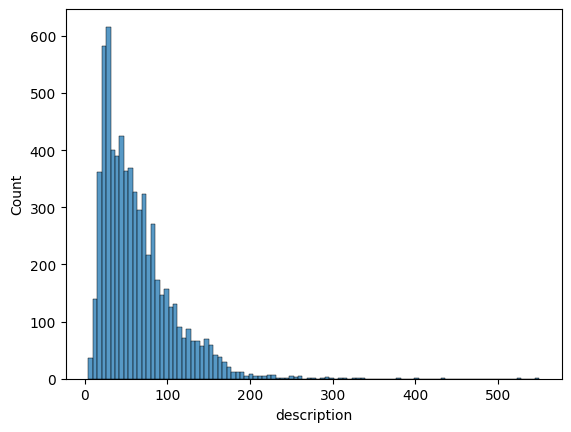

In [ ]:
len_data = data['description'].map(lambda x: len(x.split(' ')))
import seaborn as sns

sns.histplot(len_data)

In [ ]:
from uuid import uuid4
from langchain_core.documents import Document

# Создаем документы для Qdrant с UUID
documents = []
id_mapping = {}  # Сохраним соответствие UUID -> original_id

for _, row in data.iterrows():

    content = row['description']


    # Метаданные
    metadata = {
        'movie name': row.get('name', 'Unknown'),
        'year': row.get('year', 'Unknown'),
        'rating': row.get('vote_average', 'Unknown'),
        'page_url': row.get('page_url', 'Unknown'),
        'image_url': row.get('image_url', 'Unknown'),
        'genres': row['genres'],
        'director': row['director'],
        'actors': row['actors']
    }

    documents.append(Document(page_content=content, metadata=metadata))


uuids = [str(uuid4()) for _ in range(len(documents))]

print(f"✅ Создано {len(documents)} документов с UUID")

✅ Создано 6660 документов с UUID


In [ ]:
documents[0]

Document(metadata={'movie name': 'Masters of the Air', 'year': '2024', 'rating': 7.763, 'page_url': 'https://www.themoviedb.org/tv/46518', 'image_url': 'https://image.tmdb.org/t/p/original/rSAmgcoA74371rplbqM27yVsd3y.jpg', 'genres': ['Drama', 'War&Politics'], 'director': ['John Orloff'], 'actors': ['Austin Butler', 'Callum Turner', 'Anthony Boyle', 'Nate Mann', 'Stephen Campbell Moore']}, page_content='During World War II, airmen risk their lives with the 100th Bomb Group, a brotherhood forged by courage, loss, and triumph.')

In [ ]:
from langchain_qdrant import QdrantVectorStore

vector_store = QdrantVectorStore(
    client=client,
    collection_name="film_collection",
    embedding=embeddings_model
)

In [ ]:
from tqdm import tqdm

batch_size = 256
total_batches = (len(documents) + batch_size - 1) // batch_size


with tqdm(total=total_batches, desc="Добавление батчей в Qdrant") as pbar:
    for i in range(0, len(documents), batch_size):
        batch_docs = documents[i:i+batch_size]
        batch_ids = uuids[i:i+batch_size]

        vector_store.add_documents(documents=batch_docs, ids=batch_ids)
        pbar.update(1)

print(f"✅ {len(documents)} документов добавлено в Qdrant!")

Добавление батчей в Qdrant: 100%|██████████| 27/27 [01:42<00:00,  3.80s/it]

✅ 6660 документов добавлено в Qdrant!


In [ ]:
points, _ = client.scroll(
    collection_name="film_collection",
    limit=2,
    with_payload=True,
    with_vectors=True
)

In [ ]:
points[0].payload['metadata']

{'movie name': 'Texhnolyze',
 'year': '2003.0',
 'rating': 7.169693654266958,
 'page_url': 'https://www.tvmaze.com/shows/8203/texhnolyze',
 'image_url': 'https://static.tvmaze.com/uploads/images/original_untouched/29/74223.jpg',
 'genres': ['Anime', 'Drama', 'Science-Fiction', 'Action'],
 'director': ['Unknown'],
 'actors': ['Unknown']}

In [ ]:
!cp -r /content/db /content/drive/MyDrive/

In [ ]:
query = "Movie about monsters"
results_with_scores = vector_store.similarity_search_with_score(
    query,
    k=7
)

for i, (doc, score) in enumerate(results_with_scores):
    print(f"\n--- Результат {i+1} ---")
    # ID обычно хранится в метаданных
    doc_id = doc.metadata.get('_id', 'Нет ID')

    print(f"🆔 ID в базе: {doc_id}")
    print(f"📊 Similarity Score: {score:.4f}")
    print(f"Название фильма: {doc.metadata.get('movie name', 'Не указано')}")
    print(f"Год выпуска: {doc.metadata.get('year', 'Не указано')}")
    print(f"Рейтинг: {doc.metadata.get('rating', 'Не указано')}")
    print(f"Ссылка на страницу: {doc.metadata.get('page_url', 'Не указано')}")
    print(f"Ссылка на постер: {doc.metadata.get('image_url', 'Не указано')}")
    print(f"Жанры: {doc.metadata.get('genres', [])}")
    print(f"Режиссер: {doc.metadata.get('director', [])}")
    print(f"Актерский состав: {doc.metadata.get('actors', 'Не указано')}")


--- Результат 1 ---
🆔 ID в базе: 6e874239-0083-4021-862f-af3097defd59
📊 Similarity Score: 0.6777
Название фильма: Dark Hole
Год выпуска: 2021
Рейтинг: 5.667
Ссылка на страницу: https://www.themoviedb.org/tv/120314
Ссылка на постер: https://image.tmdb.org/t/p/original/s6bVrvezseNz7j1svt89ESG9ZkS.jpg
Жанры: ['Sci-Fi&Fantasy', 'Action&Adventure', 'Mystery']
Режиссер: ['Jung Yi-do']
Актерский состав: ['Kim Ok-bin', 'Lee Jun-hyuk', 'Yoon Jung-hoon', 'Park Keun-rok', 'Jang Sung-won']

--- Результат 2 ---
🆔 ID в базе: c41b635d-9e67-4cfe-b232-9e537d6c882e
📊 Similarity Score: 0.6511
Название фильма: Masters of Horror
Год выпуска: 2005
Рейтинг: 7.1
Ссылка на страницу: https://www.themoviedb.org/tv/3470
Ссылка на постер: https://image.tmdb.org/t/p/original/vgTy1Lfi5P1yD7ZvsuoPKYvxwzv.jpg
Жанры: ['Crime', 'Drama', 'Mystery', 'Sci-Fi&Fantasy']
Режиссер: ['Mick Garris']
Актерский состав: ['Unknown']

--- Результат 3 ---
🆔 ID в базе: 3a194578-c19c-4e91-bd1b-3661df4b4d3e
📊 Similarity Score: 0.6474
На

In [ ]:
points[0].payload['metadata']

{'movie name': 'Texhnolyze',
 'year': '2003.0',
 'rating': 7.169693654266958,
 'page_url': 'https://www.tvmaze.com/shows/8203/texhnolyze',
 'image_url': 'https://static.tvmaze.com/uploads/images/original_untouched/29/74223.jpg',
 'genres': ['Anime', 'Drama', 'Science-Fiction', 'Action'],
 'director': ['Unknown'],
 'actors': ['Unknown']}

In [102]:
from qdrant_client.models import Filter, FieldCondition, MatchAny, Range

my_filter = Filter(
    must=[
        # FieldCondition(
        #     key="metadata.year",
        #     match=MatchAny(any=["2010"])
        # ),
        FieldCondition(
            key="metadata.rating",
            range=Range(gt=8)
        ),
        FieldCondition(
            key="metadata.genres",
            match=MatchAny(any=["Action"])
        ),

    ],
    # must_not=[
    #     FieldCondition(
    #         key="metadata.salary",
    #         is_null=False
    #         )
    # ]
)

In [109]:
query = "Movie about monsters"
results_with_scores = vector_store.similarity_search_with_score(
    query,
    filter=my_filter,
    k=7
)

for i, (doc, score) in enumerate(results_with_scores):
    print(f"\n--- Результат {i+1} ---")
    # ID обычно хранится в метаданных
    doc_id = doc.metadata.get('_id', 'Нет ID')

    print(f"🆔 ID в базе: {doc_id}")
    print(f"📊 Similarity Score: {score:.4f}")
    print(f"Название фильма: {doc.metadata.get('movie name', 'Не указано')}")
    print(f"Год выпуска: {doc.metadata.get('year', 'Не указано')}")
    print(f"Рейтинг: {doc.metadata.get('rating', 'Не указано')}")
    print(f"Ссылка на страницу: {doc.metadata.get('page_url', 'Не указано')}")
    print(f"Ссылка на постер: {doc.metadata.get('image_url', 'Не указано')}")
    print(f"Жанры: {doc.metadata.get('genres', [])}")
    print(f"Режиссер: {doc.metadata.get('director', [])}")
    print(f"Актерский состав: {doc.metadata.get('actors', 'Не указано')}")


--- Результат 1 ---
🆔 ID в базе: 06f72e83-97c1-483f-b511-88d83b18dbea
📊 Similarity Score: 0.4657
Название фильма: Supernatural
Год выпуска: 2005.0
Рейтинг: 8.4
Ссылка на страницу: https://www.tvmaze.com/shows/19/supernatural
Ссылка на постер: https://static.tvmaze.com/uploads/images/original_untouched/445/1114097.jpg
Жанры: ['Drama', 'Action']
Режиссер: ['Unknown']
Актерский состав: ['Jared Padalecki', 'Jensen Ackles', 'Misha Collins', 'Mark Sheppard', 'Alexander Calvert']

--- Результат 2 ---
🆔 ID в базе: 94d41c43-41e3-46e6-8a67-e5497b441f67
📊 Similarity Score: 0.4498
Название фильма: Spider-Man
Год выпуска: 1994.0
Рейтинг: 8.1
Ссылка на страницу: https://www.tvmaze.com/shows/1611/spider-man
Ссылка на постер: https://static.tvmaze.com/uploads/images/original_untouched/8/21945.jpg
Жанры: ['Action&Adventure', 'Science-Fiction', 'Action']
Режиссер: ['Unknown']
Актерский состав: ['Christopher Daniel Barnes']

--- Результат 3 ---
🆔 ID в базе: fe574728-9884-4c68-894a-4506d7b8b4ef
📊 Similar

In [ ]:
!uv pip install -q langchain_groq

In [80]:
import os
import getpass
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage, HumanMessage

os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=2000
)

Enter API key for Groq: ··········


In [120]:
def format_docs(docs):
    """Форматирует документы для передачи в промпт"""
    formatted = []

    for i, doc in enumerate(docs, 1):


        # В зависимости от структуры ваших документов:
        # Если doc - это кортеж (document, score)
        if isinstance(doc, tuple) and len(doc) > 0:
            document = doc[0]  # Первый элемент - сам документ
            metadata = document.metadata
            page_content = document.page_content
        else:
            # Если doc - это уже документ
            metadata = doc.metadata
            page_content = doc.page_content

        movie_info = f"""
=== СЕРИАЛ {i} ===
Название: {metadata.get('movie name', 'Не указано')}
Год выпуска: {metadata.get('year', 'Не указано')}
Рейтинг сериала: {metadata.get('rating', 'Не указано')}
Ссылка на сериал: {metadata.get('page_url', 'Не указано')}
Ссылка на постер: {metadata.get('image_url', 'Не указано')}
Жанры: {', '.join(metadata.get('genres', [])) if metadata.get('genres') else 'Не указано'}
Режиссеры: {', '.join(metadata.get('director', [])) if metadata.get('director') else 'Не указано'}
Актерский состав: {', '.join(metadata.get('actors', [])) if metadata.get('actors') else 'Не указано'}

Описание: {page_content[:500]}...
"""

        formatted.append(movie_info)

    # Объединяем все отформатированные документы
    res = "\n".join(formatted)

    return res

print("✅ Функция форматирования создана")

✅ Функция форматирования создана


In [79]:
documents[0].metadata

{'movie name': 'Masters of the Air',
 'year': '2024',
 'rating': 7.763,
 'page_url': 'https://www.themoviedb.org/tv/46518',
 'image_url': 'https://image.tmdb.org/t/p/original/rSAmgcoA74371rplbqM27yVsd3y.jpg',
 'genres': ['Drama', 'War&Politics'],
 'director': ['John Orloff'],
 'actors': ['Austin Butler',
  'Callum Turner',
  'Anthony Boyle',
  'Nate Mann',
  'Stephen Campbell Moore']}

In [84]:
llm.invoke('Hi, how are you?')

AIMessage(content="I'm functioning properly, thank you for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm here to help answer any questions or provide information you might need. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 41, 'total_tokens': 94, 'completion_time': 0.057056677, 'prompt_time': 0.005840539, 'queue_time': 0.022439239, 'total_time': 0.062897216}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_6b5c123dd9', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--5fe15d1d-75b6-4e6f-9e1f-e7b0151f0818-0', usage_metadata={'input_tokens': 41, 'output_tokens': 53, 'total_tokens': 94})

In [85]:
messages = [
    SystemMessage(content="If you're asked your name, introduce yourself as Ivan Ivanov, and then tell me a joke about programmers."),
    HumanMessage(content="Hi, how are you?")
]

answer = llm.invoke(messages).content

print(answer)

Hello, I'm Ivan Ivanov. I'm doing well, thanks for asking. It's a beautiful day to chat. By the way, did you hear about the programmer who's afraid of open relationships? He's worried about the variables.


In [91]:
!pip show langchain

Name: langchain
Version: 0.3.27
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: langchain-core, langchain-text-splitters, langsmith, pydantic, PyYAML, requests, SQLAlchemy
Required-by: 


In [93]:
from langchain_core.prompts import ChatPromptTemplate


# Ваш промпт (корректный)
rag_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a film critic specializing in TV series with many years of experience.
    Your task is to analyze the provided series and write a review of them, describing the strengths and weaknesses of the series."""),

    ("human", """data for analysis: {context}""")
])

In [113]:
retriever = vector_store.as_retriever(
    search_type="similarity",
    search_kwargs={
        "k": 5,
        "query_filter": my_filter
    }
)

In [111]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

# Создаем RAG цепочку
rag_chain = (
    {
        "context": retriever | format_docs,
        "question": RunnablePassthrough()
    } # словарь, в котором ключи - это переменные, которые будут переданы в промпт
    | rag_prompt # промпт для RAG
    | llm # тут можно поставить любую llm-модель
    | StrOutputParser() # для вывода ответа в читаемом виде
)

print("✅ RAG цепочка создана")

✅ RAG цепочка создана


In [119]:
# Тестируем
question = "I'm really love to see serial with Cillian Murphy"
try:
    answer = rag_chain.invoke(question)
    print("🔍 ОТВЕТ RAG:")
    print(answer)
except Exception as e:
    print(f"❌ Ошибка: {e}")

🔍 Полученный документ: page_content='Experience the thrills of vigilante justice as millionaire playboy Bruce Wayne and alter-ego Batman protect the streets of Gotham City from a host of villains including archnemesis The Joker, deadly-beautiful Poison Ivy and primitive Killer Croc in a fresh take on super hero storytelling. Intelligent, dramatic stories, unique characters and sharp dialog shaped this edgy TV series into an Emmy®-winning powerhouse that brought the Caped Crusader out of the dark alleys of TV history and into the present for fans of all ages.' metadata={'movie name': 'Batman: The Animated Series', 'year': '1992.0', 'rating': 8.5, 'page_url': 'https://www.tvmaze.com/shows/757/batman-the-animated-series', 'image_url': 'https://static.tvmaze.com/uploads/images/original_untouched/80/202273.jpg', 'genres': ['Action&Adventure', 'Science-Fiction', 'Action'], 'director': ['Unknown'], 'actors': ['Kevin Conroy', 'Clive Revill', 'Efrem Zimbalist', 'Jr.', 'Bob Hastings', 'Loren Les